In [102]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pickle

In [7]:
df=pd.read_csv("C:\\Users\\LENOVO\\Downloads\\Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [15]:
#Handling missing value
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [17]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [27]:
categorical_columns = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns = categorical_columns, drop_first = True)


In [43]:
from sklearn.preprocessing import StandardScaler
numerical_features = df.select_dtypes(['int64','float64']).columns
scaler =  StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

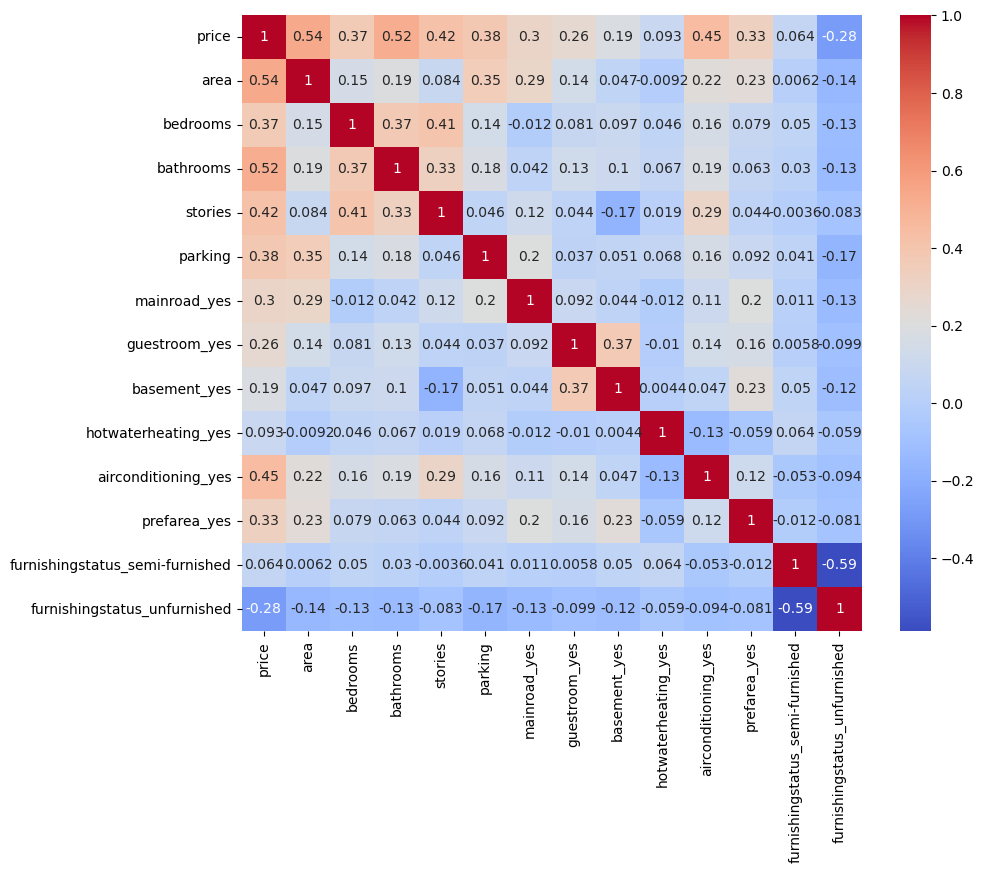

In [45]:
#correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.show()

In [106]:
selected_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

In [108]:
from sklearn.model_selection import train_test_split

X = data[selected_features]
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
# Initialize and train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print("Random Forest MAE:", mean_absolute_error(y_test, y_pred_rf))
print("Random Forest R2:", r2_score(y_test, y_pred_rf))


Random Forest MAE: 1150445.3340978594
Random Forest R2: 0.48691222287234903


In [112]:
# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30]
}

grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2')
grid_rf.fit(X_train, y_train)

print("Best Parameters for Random Forest:", grid_rf.best_params_)


Best Parameters for Random Forest: {'max_depth': 10, 'n_estimators': 50}


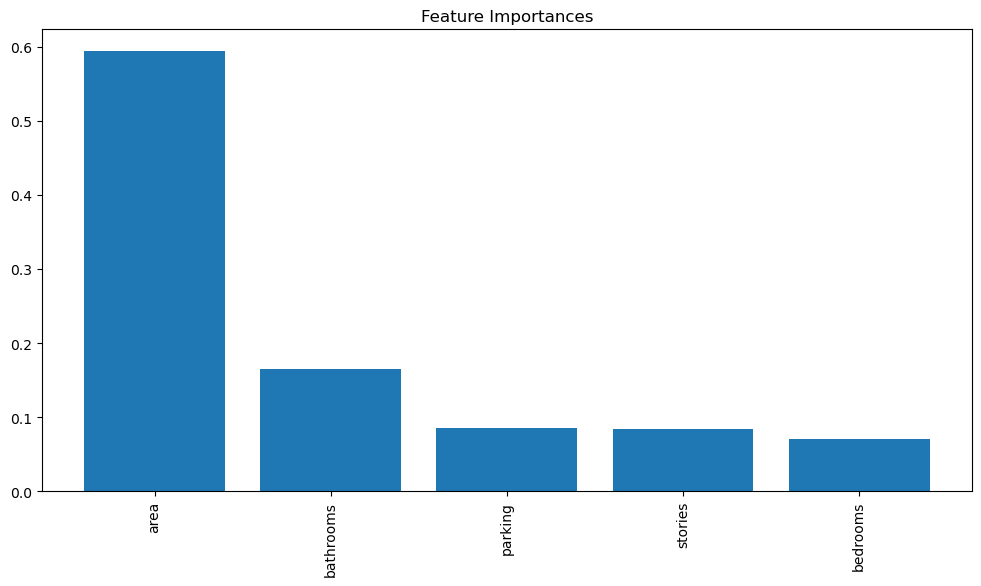

In [113]:
# Feature importance from Random Forest
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.show()


In [114]:
import pickle
from sklearn.ensemble import RandomForestRegressor

# Assuming you have trained the model
model = RandomForestRegressor()
model.fit(X_train, y_train)  # Replace with your actual training

# Save the model to a file
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(model, f)



In [89]:
from flask import Flask, request, jsonify
import joblib
import numpy as np

# Load the model
model = joblib.load('random_forest_model.pkl')

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json  # Expecting data as a JSON object
    features = np.array(data['features']).reshape(1, -1)
    prediction = model.predict(features)
    return jsonify({'prediction': prediction[0]})

if __name__ == '__main__':
    app.run(debug=True, host='0.0.0.0', port=5000)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://192.168.212.199:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\LENOVO\anaconda4\Lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


SyntaxError: invalid syntax (2255720966.py, line 1)

In [99]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pickle

# Load the dataset
data = pd.read_csv("C:\\Users\\LENOVO\\Downloads\\Housing.csv")

# Select only 5 important features for retraining
# Replace these with the actual feature names from your dataset
selected_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Define the input features (X) and target variable (y)
X = data[selected_features]
y = data['price']  # Assuming 'price' is the target column

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error to evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Save the trained model to a file (so it can be used in Flask)
with open('random_forest_model_5_features.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model retrained with 5 features and saved as 'random_forest_model_5_features.pkl'.")


Mean Squared Error: 2593438212040.279
Model retrained with 5 features and saved as 'random_forest_model_5_features.pkl'.
